In [2]:
import numpy as np
import matplotlib.pyplot as plt
from lab_utils_multi import zscore_normalize_features, run_gradient_descent_feng
np.set_printoptions(precision=2)

In [12]:
x=np.arange(0,20,1)
#let.s say we have y=f(x) where f is a 2 degree polynomial instead of being a linear polynomial
y=1+x**2
x=x.reshape(-1,1)

Iteration         0, Cost: 1.65756e+03
Iteration       100, Cost: 6.94549e+02
Iteration       200, Cost: 5.88475e+02
Iteration       300, Cost: 5.26414e+02
Iteration       400, Cost: 4.90103e+02
Iteration       500, Cost: 4.68858e+02
Iteration       600, Cost: 4.56428e+02
Iteration       700, Cost: 4.49155e+02
Iteration       800, Cost: 4.44900e+02
Iteration       900, Cost: 4.42411e+02
w,b found by gradient descent: w: [18.7], b: -52.0834


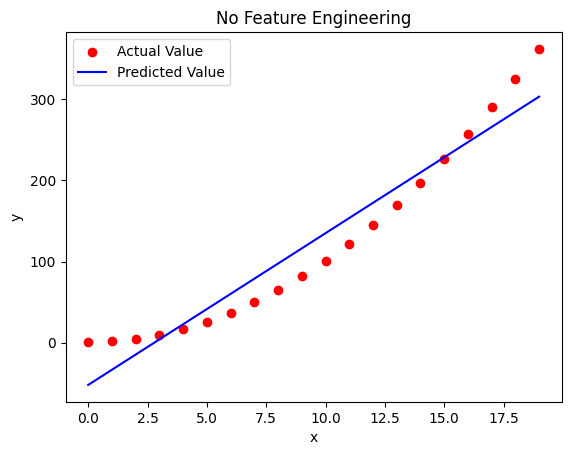

In [13]:
#lets find w and b using linear gradient descent for this function
w,b=run_gradient_descent_feng(x,y,iterations=1000,alpha=0.01)

#plotting the points and then the line
plt.scatter(x,y,c='r',label='Actual Value')
plt.plot(x,x*w+b,c='b',label='Predicted Value')
plt.title('No Feature Engineering')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


As we can see this is a badly fitted line. To make this a better fit, we need to do feature engineering with our data to fit a curve in the points. For this we can convert x to x^2

Iteration         0, Cost: 7.32922e+03
Iteration      1000, Cost: 2.24844e-01
Iteration      2000, Cost: 2.22795e-01
Iteration      3000, Cost: 2.20764e-01
Iteration      4000, Cost: 2.18752e-01
Iteration      5000, Cost: 2.16758e-01
Iteration      6000, Cost: 2.14782e-01
Iteration      7000, Cost: 2.12824e-01
Iteration      8000, Cost: 2.10884e-01
Iteration      9000, Cost: 2.08962e-01
w,b found by gradient descent: w: [1.], b: 0.0490


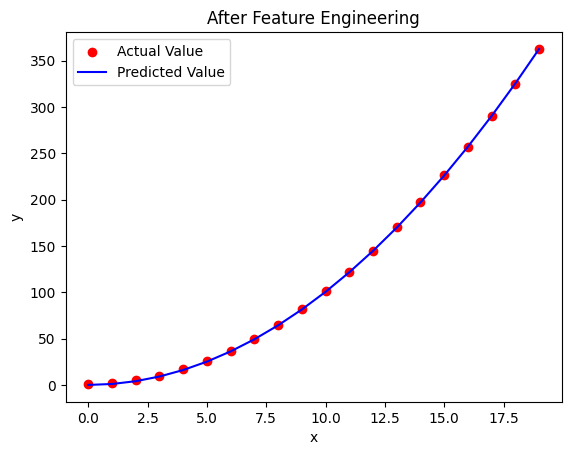

In [16]:
x2=x**2
x2=x2.reshape(-1,1)

w1,b1=run_gradient_descent_feng(x2,y,iterations=10000,alpha=1e-5)

#plotting the points and then the line
plt.scatter(x,y,c='r',label='Actual Value')
plt.plot(x,np.dot(x2,w1)+b1,c='b',label='Predicted Value')
plt.title('After Feature Engineering')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Similarly, we can add multiple features in feature engineering to make it fit better with our data

In [17]:
x=np.arange(0,20,1)
y=x**2

x1=np.c_[x,x**2,x**3]

Iteration         0, Cost: 1.14029e+03
Iteration      1000, Cost: 3.28539e+02
Iteration      2000, Cost: 2.80443e+02
Iteration      3000, Cost: 2.39389e+02
Iteration      4000, Cost: 2.04344e+02
Iteration      5000, Cost: 1.74430e+02
Iteration      6000, Cost: 1.48896e+02
Iteration      7000, Cost: 1.27100e+02
Iteration      8000, Cost: 1.08495e+02
Iteration      9000, Cost: 9.26132e+01
w,b found by gradient descent: w: [0.08 0.54 0.03], b: 0.0106


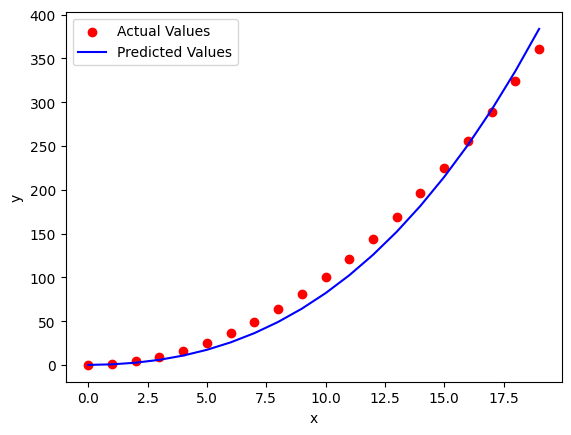

In [20]:
w,b=run_gradient_descent_feng(x1,y,iterations=10000,alpha=1e-7)
plt.scatter(x,y,c='r',label='Actual Values')
plt.plot(x,np.dot(x1,w)+b,c='b',label='Predicted Values')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

According to the values of w and b, the model is y=0.08x+0.54x^2+0.03x^3+0.0106

In [27]:
#We can make the model fit even better by scaling the features to bring them all to the same range of values
x=np.arange(0,20,1)
y=x**2

x1=np.c_[x,x**2,x**3]
x1_normalised=zscore_normalize_features(x1)
for i in range(len(x1)):
    print(x1[i],'            ',x1_normalised[i])

[0 0 0]              [-1.65 -1.09 -0.86]
[1 1 1]              [-1.47 -1.08 -0.86]
[2 4 8]              [-1.3  -1.05 -0.86]
[ 3  9 27]              [-1.13 -1.01 -0.85]
[ 4 16 64]              [-0.95 -0.95 -0.83]
[  5  25 125]              [-0.78 -0.87 -0.8 ]
[  6  36 216]              [-0.61 -0.77 -0.76]
[  7  49 343]              [-0.43 -0.66 -0.7 ]
[  8  64 512]              [-0.26 -0.52 -0.62]
[  9  81 729]              [-0.09 -0.37 -0.52]
[  10  100 1000]              [ 0.09 -0.21 -0.39]
[  11  121 1331]              [ 0.26 -0.02 -0.23]
[  12  144 1728]              [ 0.43  0.18 -0.04]
[  13  169 2197]              [0.61 0.4  0.19]
[  14  196 2744]              [0.78 0.64 0.45]
[  15  225 3375]              [0.95 0.89 0.75]
[  16  256 4096]              [1.13 1.17 1.1 ]
[  17  289 4913]              [1.3  1.46 1.49]
[  18  324 5832]              [1.47 1.77 1.93]
[  19  361 6859]              [1.65 2.09 2.42]


Iteration         0, Cost: 9.42147e+03
Iteration      1000, Cost: 4.21521e+00
Iteration      2000, Cost: 3.23649e+00
Iteration      3000, Cost: 2.48501e+00
Iteration      4000, Cost: 1.90802e+00
Iteration      5000, Cost: 1.46500e+00
Iteration      6000, Cost: 1.12484e+00
Iteration      7000, Cost: 8.63665e-01
Iteration      8000, Cost: 6.63131e-01
Iteration      9000, Cost: 5.09160e-01
w,b found by gradient descent: w: [ 7.67 93.95 12.29], b: 123.5000


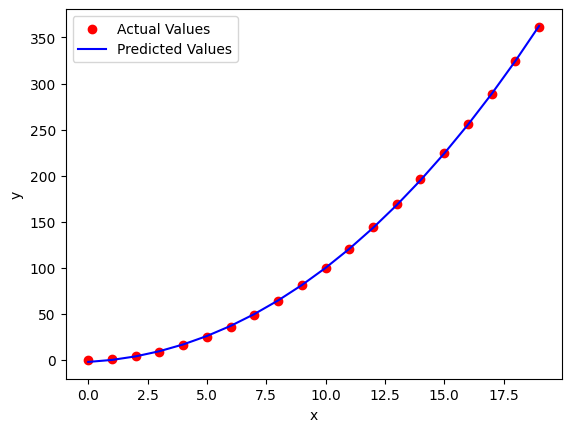

In [29]:
w,b=run_gradient_descent_feng(x1_normalised,y,iterations=10000,alpha=1e-1)
plt.scatter(x,y,c='r',label='Actual Values')
plt.plot(x,np.dot(x1_normalised,w)+b,c='b',label='Predicted Values')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Using feature engineering, we can even model complex functions

Iteration         0, Cost: 2.24887e-01
Iteration    100000, Cost: 2.31061e-02
Iteration    200000, Cost: 1.83619e-02
Iteration    300000, Cost: 1.47950e-02
Iteration    400000, Cost: 1.21114e-02
Iteration    500000, Cost: 1.00914e-02
Iteration    600000, Cost: 8.57025e-03
Iteration    700000, Cost: 7.42385e-03
Iteration    800000, Cost: 6.55908e-03
Iteration    900000, Cost: 5.90594e-03
w,b found by gradient descent: w: [-1.61e+00 -1.01e+01  3.00e+01 -6.92e-01 -2.37e+01 -1.51e+01  2.09e+01
 -2.29e-03 -4.69e-03  5.51e-02  1.07e-01 -2.53e-02  6.49e-02], b: -0.0073


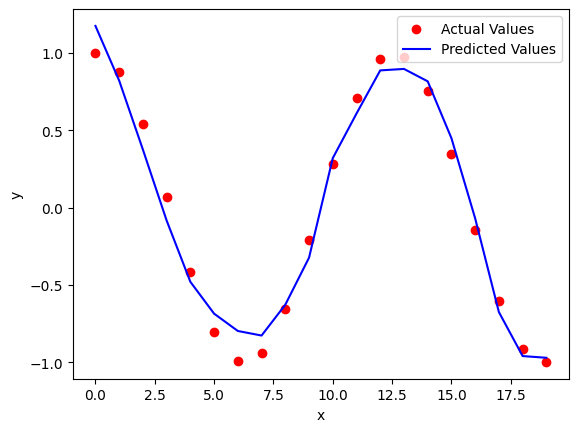

In [50]:
x=np.arange(0,20,1)
y=np.cos(x/2)

x1=np.c_[x,x**2,x**3,x**4,x**5,x**6,x**7,x**8,x**9,x**10,x**11,x**12,x**13]
x1_normalised=zscore_normalize_features(x1)

w,b=run_gradient_descent_feng(x1_normalised,y,iterations=1000000,alpha=0.1)
plt.scatter(x,y,c='r',label='Actual Values')
plt.plot(x,np.dot(x1_normalised,w)+b,c='b',label='Predicted Values')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()